In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")
data

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika
2231,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika


In [3]:
data["Yas"].describe()

count    2235.000000
mean       47.327069
std        15.208634
min         2.000000
25%        38.000000
50%        46.000000
75%        56.000000
max        92.000000
Name: Yas, dtype: float64

In [4]:
data["TedaviSuresi"].describe()

count         2235
unique          23
top       15 Seans
freq          1670
Name: TedaviSuresi, dtype: object

In [5]:
data["UygulamaSuresi"].describe()

count          2235
unique           10
top       20 Dakika
freq           1535
Name: UygulamaSuresi, dtype: object

In [6]:
TARGET = "TedaviSuresi"

In [7]:
data.shape

(2235, 13)

In [8]:
data.columns

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   HastaNo          2235 non-null   int64 
 1   Yas              2235 non-null   int64 
 2   Cinsiyet         2066 non-null   object
 3   KanGrubu         1560 non-null   object
 4   Uyruk            2235 non-null   object
 5   KronikHastalik   1624 non-null   object
 6   Bolum            2224 non-null   object
 7   Alerji           1291 non-null   object
 8   Tanilar          2160 non-null   object
 9   TedaviAdi        2235 non-null   object
 10  TedaviSuresi     2235 non-null   object
 11  UygulamaYerleri  2014 non-null   object
 12  UygulamaSuresi   2235 non-null   object
dtypes: int64(2), object(11)
memory usage: 227.1+ KB


In [10]:
data.describe()

,HastaNo,Yas
count,2235.000000,2235.000000
mean,145333.100224,47.327069
std,115.214248,15.208634
min,145134.000000,2.000000
25%,145235.000000,38.000000
50%,145331.000000,46.000000
75%,145432.000000,56.000000
max,145537.000000,92.000000


In [11]:
na = data.isna().sum().sort_values(ascending=False)
na

Alerji             944
KanGrubu           675
KronikHastalik     611
UygulamaYerleri    221
Cinsiyet           169
Tanilar             75
Bolum               11
HastaNo              0
Yas                  0
Uyruk                0
TedaviAdi            0
TedaviSuresi         0
UygulamaSuresi       0
dtype: int64

In [12]:
na_percent = (na/len(data)*100).round(2)
pd.DataFrame({"missing": na, "missing_%": na_percent})

,missing,missing_%
Alerji,944,42.24
KanGrubu,675,30.20
KronikHastalik,611,27.34
UygulamaYerleri,221,9.89
Cinsiyet,169,7.56
Tanilar,75,3.36
Bolum,11,0.49
HastaNo,0,0.00
Yas,0,0.00
Uyruk,0,0.00


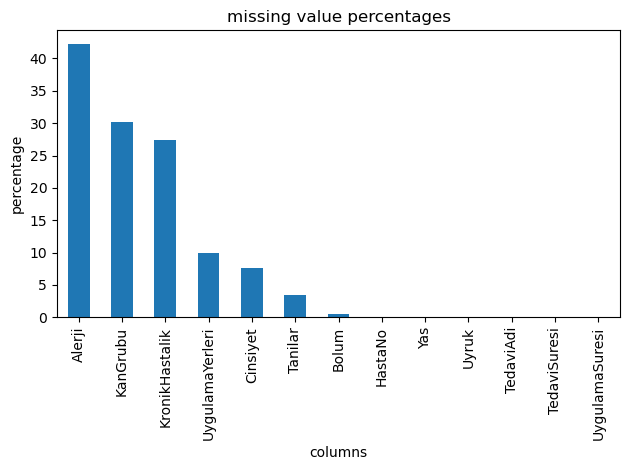

In [13]:
na_percent.plot(kind="bar")
plt.title("missing value percentages")
plt.ylabel("percentage")
plt.xlabel("columns")
plt.tight_layout()
plt.show()

In [14]:
def to_num(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, (int, float)):
        return float(x)
    m = re.search(r"\d+", str(x))
    return float(m.group()) if m else np.nan

In [15]:
for col in [TARGET, "Yas", "UygulamaSuresi"]:
    if col in data.columns:
        data[col] = data[col].apply(to_num)

In [16]:
if "Yas" in data.columns:
    data.loc[(data["Yas"] < 0) | (data["Yas"] > 120), "Yas"] = np.nan

In [17]:
number_columns = data.select_dtypes(include=[np.number]).columns.tolist()
number_columns

['HastaNo', 'Yas', 'TedaviSuresi', 'UygulamaSuresi']

In [18]:
categorical_columns = data.select_dtypes(include=["object"]).columns.tolist()
categorical_columns

['Cinsiyet',
 'KanGrubu',
 'Uyruk',
 'KronikHastalik',
 'Bolum',
 'Alerji',
 'Tanilar',
 'TedaviAdi',
 'UygulamaYerleri']

In [19]:
pd.DataFrame({
    "dtype": data.dtypes.astype(str),
    "nunique": data.nunique(dropna=True),
    "missing_%": (data.isna().sum()/len(data)*100).round(2)
}).sort_values(["dtype","nunique"], ascending=[True, False])

,dtype,nunique,missing_%
Yas,float64,75,0.00
TedaviSuresi,float64,23,0.00
UygulamaSuresi,float64,10,0.00
HastaNo,int64,404,0.00
Tanilar,object,367,3.36
TedaviAdi,object,244,0.00
KronikHastalik,object,220,27.34
Alerji,object,38,42.24
UygulamaYerleri,object,37,9.89
Bolum,object,10,0.49


In [20]:
data[TARGET].describe()

count    2235.000000
mean       14.570917
std         3.725322
min         1.000000
25%        15.000000
50%        15.000000
75%        15.000000
max        37.000000
Name: TedaviSuresi, dtype: float64

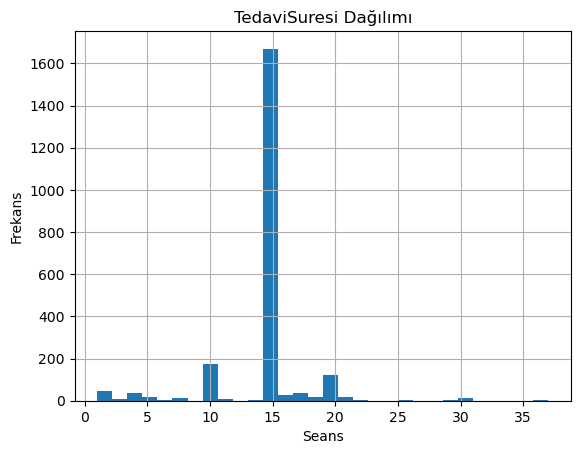

In [21]:
data[TARGET].dropna().hist(bins=30)
plt.title("TedaviSuresi Dağılımı")
plt.xlabel("Seans")
plt.ylabel("Frekans")
plt.show()

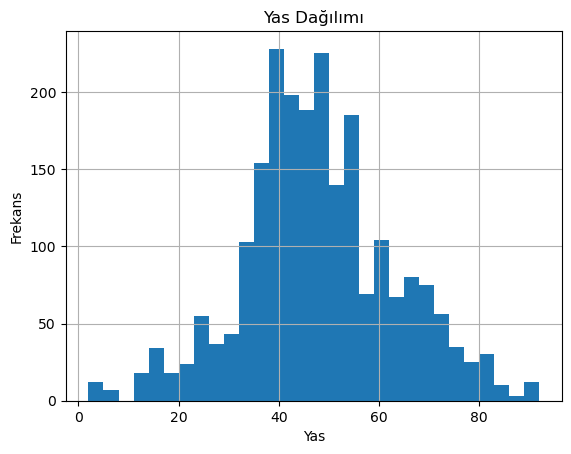

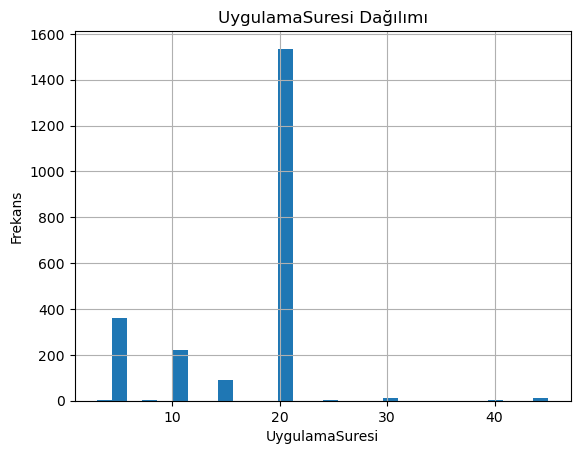

In [22]:
for col in [c for c in ["Yas", "UygulamaSuresi"] if c in number_columns]:
    data[col].dropna().hist(bins=30)
    plt.title(f"{col} Dağılımı")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.show()

In [23]:
freq_tables = {
    col: data[col].value_counts(dropna=False).head(10)
    for col in categorical_columns
}
freq_tables

{'Cinsiyet': Cinsiyet
 Kadın    1274
 Erkek     792
 NaN       169
 Name: count, dtype: int64,
 'KanGrubu': KanGrubu
 NaN       675
 0 Rh+     579
 A Rh+     540
 B Rh+     206
 AB Rh+     80
 B Rh-      68
 A Rh-      53
 0 Rh-      26
 AB Rh-      8
 Name: count, dtype: int64,
 'Uyruk': Uyruk
 Türkiye       2173
 Tokelau         27
 Arnavutluk      13
 Azerbaycan      12
 Libya           10
 Name: count, dtype: int64,
 'KronikHastalik': KronikHastalik
 NaN                                     611
 Myastenia gravis                         38
 Aritmi                                   36
 Fascioscapulohumeral Distrofi            36
 Limb-Girdle Musküler Distrofi, Astım     34
 Hipertiroidizm                           34
 Kalp yetmezliği                          33
 Hipertansiyon                            31
 Astım                                    30
 Becker Musküler Distrofisi               29
 Name: count, dtype: int64,
 'Bolum': Bolum
 Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi 

In [24]:
import seaborn as sns
sns.set_theme(style="whitegrid")


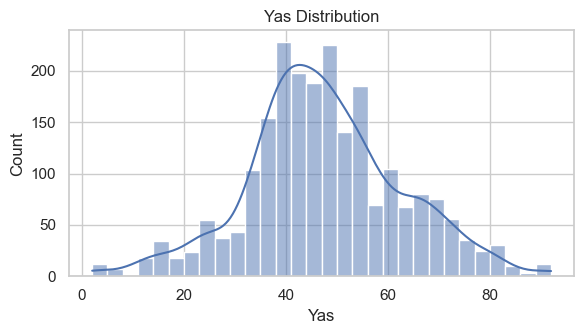

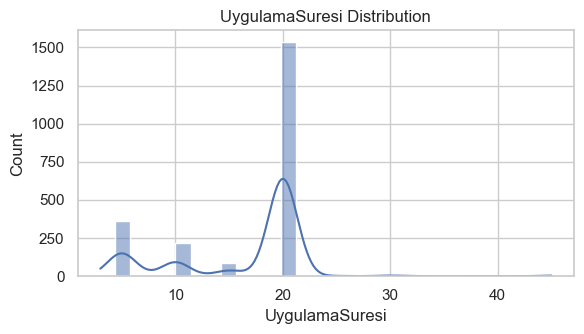

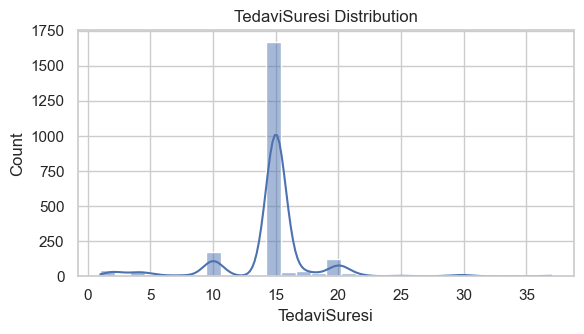

In [25]:
for col in [c for c in ["Yas", "UygulamaSuresi", TARGET] if c in data.columns]:
    plt.figure(figsize=(6,3.5))
    sns.histplot(data[col].dropna(), bins=30, kde=True)
    plt.title(f"{col} Distribution"); plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout(); plt.show()


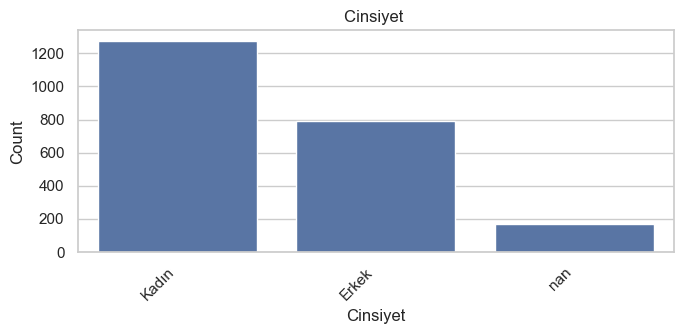

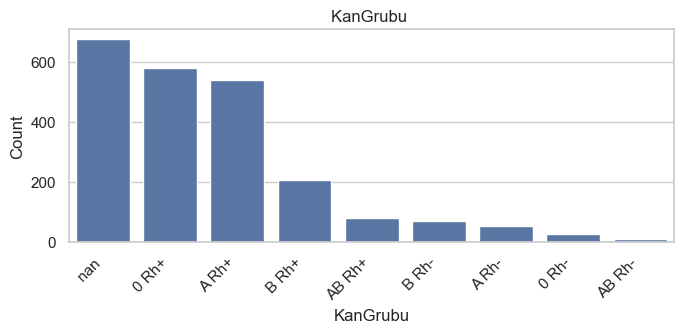

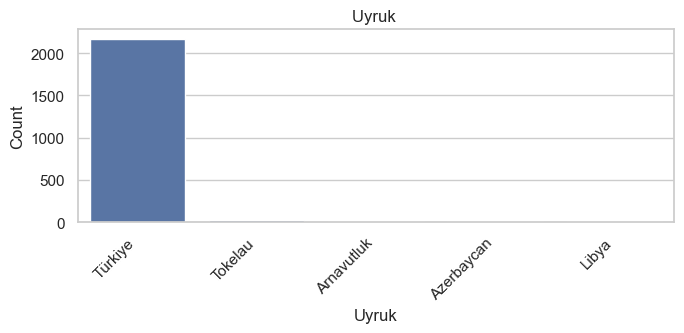

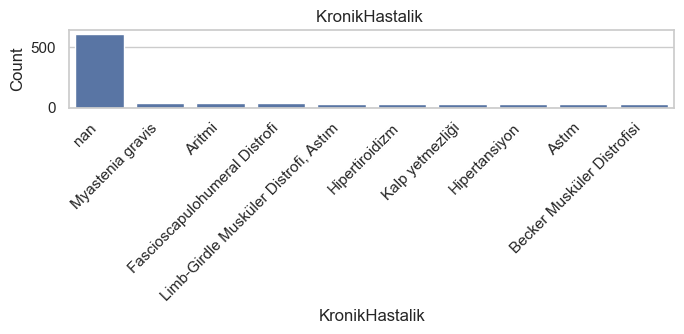

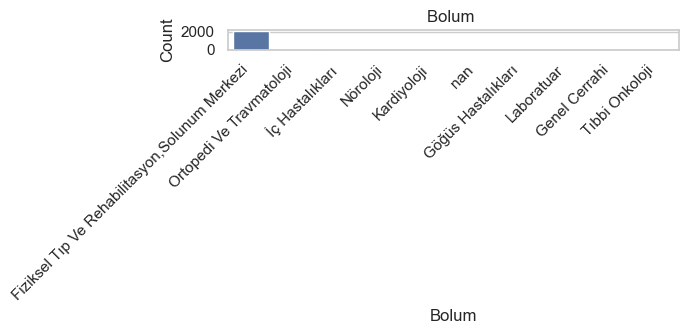

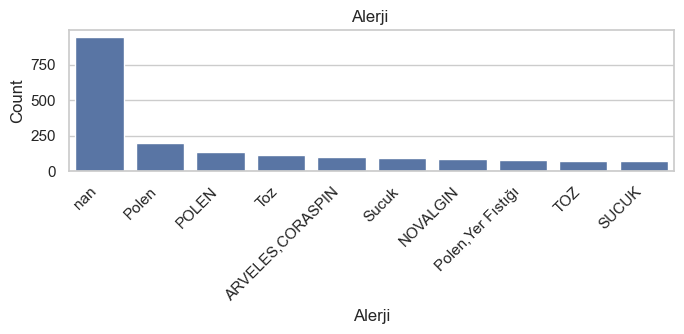

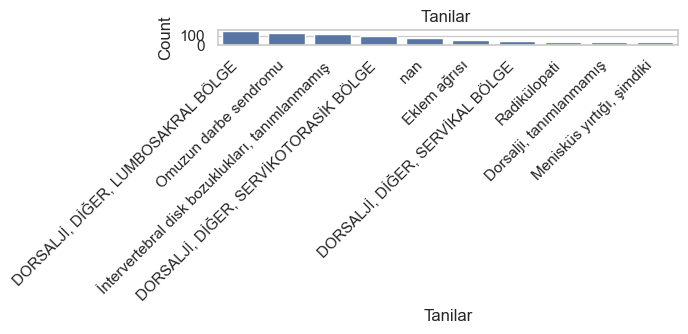

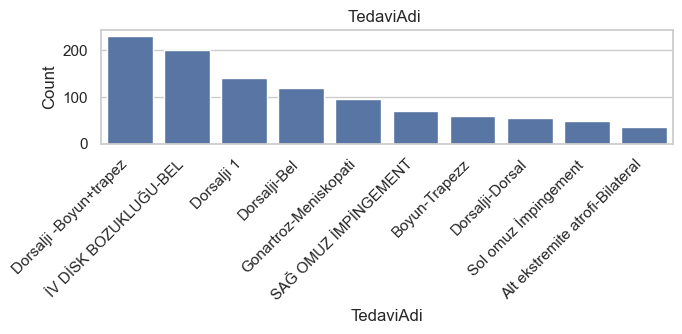

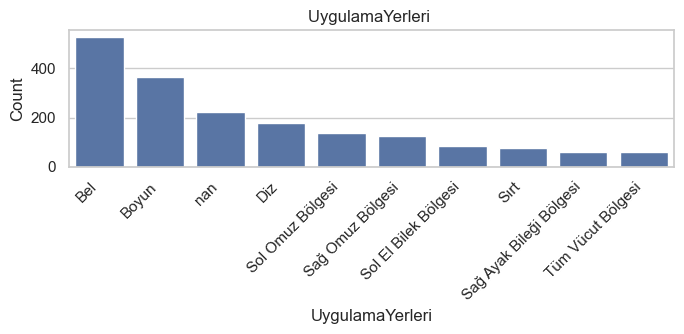

In [26]:
def plot_top_counts(df, col, top=10):
    vc = df[col].value_counts(dropna=False).head(top)
    plt.figure(figsize=(7,3.5))
    sns.barplot(x=vc.index.astype(str), y=vc.values)
    plt.title(f"{col} ")
    plt.ylabel("Count"); plt.xlabel(col)
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout(); plt.show()

for col in categorical_columns:
    plot_top_counts(data, col, top=10)


In [27]:
group_means = {
    col: data.groupby(col, dropna=False)[TARGET].mean().sort_values(ascending=False).head(10)
    for col in categorical_columns
}
group_means

{'Cinsiyet': Cinsiyet
 Kadın    14.771586
 Erkek    14.406566
 NaN      13.828402
 Name: TedaviSuresi, dtype: float64,
 'KanGrubu': KanGrubu
 NaN       15.217778
 AB Rh-    15.000000
 B Rh+     14.771845
 0 Rh+     14.411054
 AB Rh+    14.350000
 0 Rh-     14.230769
 B Rh-     14.176471
 A Rh-     14.018868
 A Rh+     14.003704
 Name: TedaviSuresi, dtype: float64,
 'Uyruk': Uyruk
 Tokelau       20.185185
 Libya         20.000000
 Türkiye       14.509434
 Arnavutluk    12.230769
 Azerbaycan    11.083333
 Name: TedaviSuresi, dtype: float64,
 'KronikHastalik': KronikHastalik
 Polimiyozit, Myastenia gravis                                             29.000000
 Limb-Girdle Musküler Distrofi, Kalp yetmezliği, Astım, Polimiyozit        20.185185
 Myastenia gravis, Duchenne Musküler Distrofisi, Hipertiroidizm, Astım     20.000000
 Astım, Hipertiroidizm, Becker Musküler Distrofisi, Aritmi                 20.000000
 Diyabet, Fascioscapulohumeral Distrofi, Kalp yetmezliği, Hipertansiyon    20.000

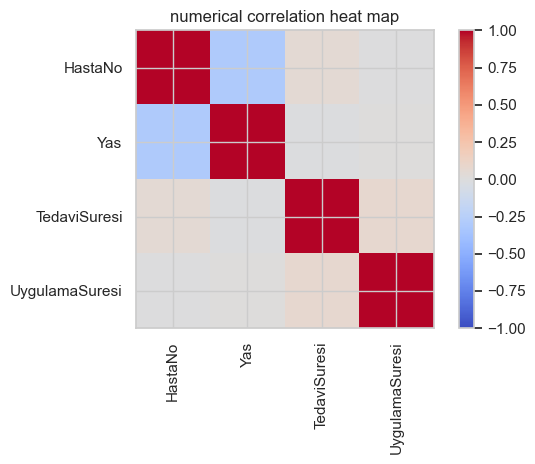

In [28]:
valid_num = [c for c in number_columns if data[c].nunique(dropna=True) > 1]
if TARGET in valid_num and len(valid_num) > 1:
    data[valid_num].corr(numeric_only=True)[TARGET].sort_values(ascending=False)
    cmat = data[valid_num].corr(numeric_only=True)
    plt.imshow(cmat, cmap="coolwarm", vmin=-1, vmax=1)
    plt.colorbar(); plt.title("numerical correlation heat map")
    plt.xticks(range(len(valid_num)), valid_num, rotation=90)
    plt.yticks(range(len(valid_num)), valid_num)
    plt.tight_layout(); plt.show()
else:
    "not enough data for correlation"

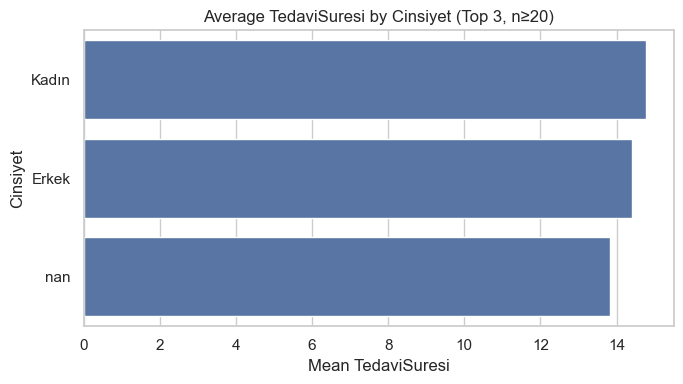

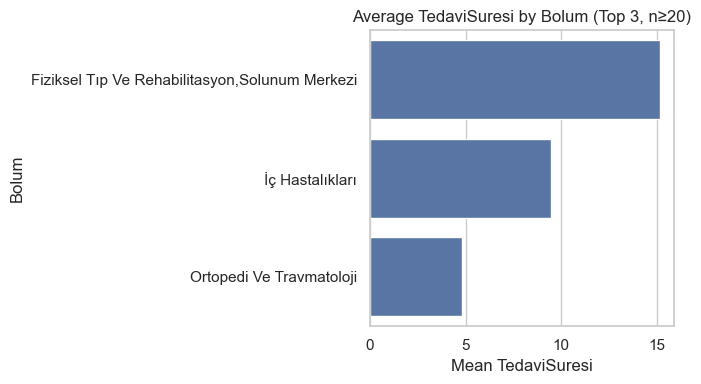

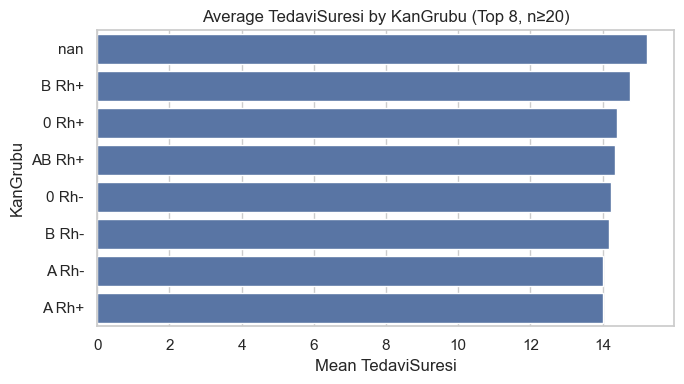

In [29]:
def plot_group_means(df, cat_col, target, top=10, min_count=20):
    vc = df[cat_col].value_counts(dropna=False)
    keep = vc[vc >= min_count].head(top).index
    sub = df[df[cat_col].isin(keep)]
    means = sub.groupby(cat_col, dropna=False)[target].mean().sort_values(ascending=False)

    plt.figure(figsize=(7,4))
    sns.barplot(x=means.values, y=means.index.astype(str), orient="h")
    plt.title(f"Average {target} by {cat_col} (Top {len(keep)}, n≥{min_count})")
    plt.xlabel(f"Mean {target}"); plt.ylabel(cat_col)
    plt.tight_layout(); plt.show()

# örnek: öncelikli 3 kategorik; yoksa ilk 3
prefer = [c for c in ["Cinsiyet", "Bolum", "KanGrubu"] if c in data.columns]
cat_for_plots = prefer if len(prefer) else data.select_dtypes(include="object").columns[:3].tolist()

for c in cat_for_plots:
    plot_group_means(data, c, TARGET, top=10, min_count=20)


---------------------------------------------------------------------------

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
mask = data[TARGET].notna()
X = data.loc[mask].drop(columns=[TARGET])
y = data.loc[mask, TARGET]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test = X_train.copy(), X_test.copy()

In [33]:
number_columns = X_train.select_dtypes(include="number").columns.tolist()
categorical_columns = X_train.select_dtypes(include="object").columns.tolist()

In [34]:
for c in categorical_columns:
    X_train[c] = X_train[c].astype("object")
    X_test[c]  = X_test[c].astype("object")

In [35]:
X_train[number_columns] = X_train[number_columns].fillna(X_train[number_columns].median())
X_test[number_columns]  = X_test[number_columns].fillna(X_train[number_columns].median())

In [36]:
for c in categorical_columns:
    fill_val = X_train[c].mode(dropna=True).iloc[0] if not X_train[c].mode(dropna=True).empty else "Unknown"
    X_train[c] = X_train[c].fillna(fill_val)
    X_test[c]  = X_test[c].fillna(fill_val)

In [37]:
def collapse_rare(s, min_count=20):
    vc = s.value_counts(dropna=False)
    rare = vc[vc < min_count].index
    return s.where(~s.isin(rare), "Other")

for c in categorical_columns:
    X_train[c] = collapse_rare(X_train[c])
    X_test[c]  = X_test[c].where(X_test[c].isin(X_train[c].unique()), "Other")

In [38]:
X_train_ready = pd.get_dummies(X_train, columns=categorical_columns, drop_first=False)
X_test_ready  = pd.get_dummies(X_test,  columns=categorical_columns, drop_first=False)
X_test_ready  = X_test_ready.reindex(columns=X_train_ready.columns, fill_value=0)

In [39]:
scaler = StandardScaler()
X_train_ready[number_columns] = scaler.fit_transform(X_train_ready[number_columns])
X_test_ready[number_columns]  = scaler.transform(X_test_ready[number_columns])

In [40]:
X_train_ready.to_csv("train_ready.csv", index=False)
X_test_ready.to_csv("test_ready.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

In [41]:
X_train_ready.shape, X_test_ready.shape

((1788, 88), (447, 88))

In [42]:
X_train_ready.isna().sum().sum(), X_test_ready.isna().sum().sum()

(0, 0)

In [43]:
set(X_train_ready.columns) == set(X_test_ready.columns), len(X_train_ready.columns)

(True, 88)

In [44]:
X_train_ready.head()

,HastaNo,Yas,UygulamaSuresi,Cinsiyet_Erkek,Cinsiyet_Kadın,KanGrubu_0 Rh+,KanGrubu_A Rh+,KanGrubu_A Rh-,KanGrubu_AB Rh+,KanGrubu_B Rh+,...,UygulamaYerleri_Sağ El Bilek Bölgesi,UygulamaYerleri_Sağ Kalça Bölgesi,UygulamaYerleri_Sağ Omuz Bölgesi,UygulamaYerleri_Sol Ayak Bileği Bölgesi,UygulamaYerleri_Sol Diz Bölgesi,UygulamaYerleri_Sol El Bilek Bölgesi,UygulamaYerleri_Sol Kalça Bölgesi,UygulamaYerleri_Sol Omuz Bölgesi,UygulamaYerleri_Sırt,UygulamaYerleri_Tüm Vücut Bölgesi
1266,0.187459,0.041377,0.535177,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
816,-0.474636,1.506380,0.535177,False,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1559,0.657895,-0.491351,-1.891851,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1511,0.579489,-0.158396,0.535177,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1898,1.198026,-0.557942,0.535177,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
y_train.describe(), y_test.describe()

(count    1788.000000
 mean       14.532998
 std         3.675343
 min         1.000000
 25%        15.000000
 50%        15.000000
 75%        15.000000
 max        37.000000
 Name: TedaviSuresi, dtype: float64,
 count    447.000000
 mean      14.722595
 std        3.919482
 min        1.000000
 25%       15.000000
 50%       15.000000
 75%       15.000000
 max       37.000000
 Name: TedaviSuresi, dtype: float64)

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
m = RandomForestRegressor(random_state=42).fit(X_train_ready, y_train)
r2_score(y_test, m.predict(X_test_ready))

0.8979227330003531